### Project 1 - IE6400 Foundations of Data Analytics - Group 8

Team members:

Jaamie Maarsh Joy Martin
joymartin.j@northeastern.edu
+1 (206)-356-0024

Wenbo Zhu
zhu.wenbo@northeastern.edu
+1 (678)-873-3680

Kalyan Kumar Chenchu Malakondaiah
chenchumalakondaia.k@northeastern.edu
+1 (206)-679-0953


In [109]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering


#Libraries for Silhouette score, Calinski-Harabasz and Dunn Index
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [71]:
pip install drawdata

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install validclust

Note: you may need to restart the kernel to use updated packages.


### Loading of datasets

In [73]:
#Datasets Used for Task-1
data1 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/Data1.csv')
data2 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/Data2.csv')
data3 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/Data3.csv')
data4 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/Data4.csv')
data5 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/Data5.csv')
#Datasets used for Task-2
world_data_df = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/World Indicators.csv', low_memory=False)


### Task-1

### Plotting (2D or 3D) the data points for each dataset and color them according to the original class

### For Data 1

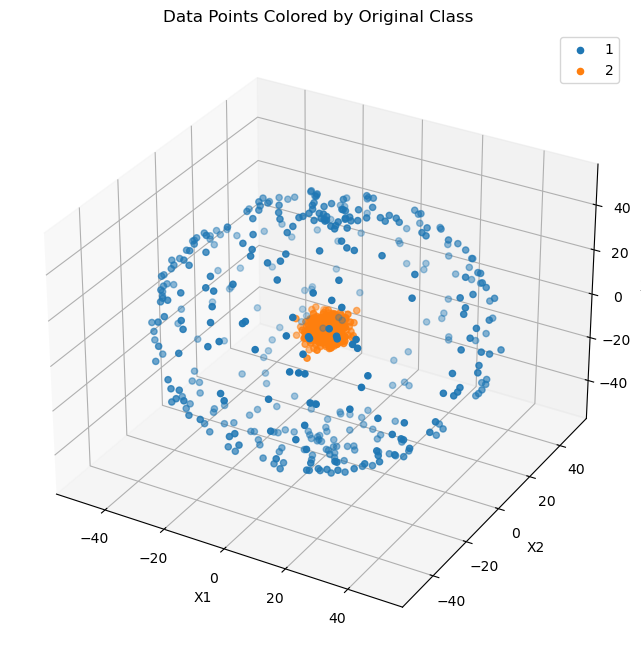

In [75]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

data = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/Data1.csv')

# Extracting features and class column
features = data[['X1', 'X2', 'X3']]  
class_labels = data['Class']

# Creating a 3D scatter plot with colors based on class labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in class_labels.unique():
    ax.scatter(features[class_labels == label]['X1'], features[class_labels == label]['X2'],
               features[class_labels == label]['X3'], label=label)

ax.set_title('Data Points Colored by Original Class')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()
plt.show()

### For Data 2

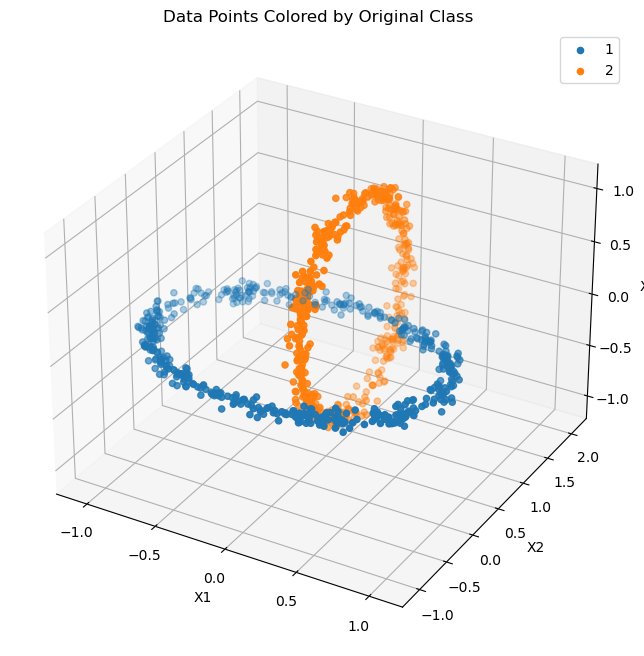

In [77]:
data = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/Data2.csv')

# Extracting features and class column
features = data[['X1', 'X2', 'X3']] 
class_labels = data['Class']

# Creating a 3D scatter plot with colors based on class labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in class_labels.unique():
    ax.scatter(features[class_labels == label]['X1'], features[class_labels == label]['X2'],
               features[class_labels == label]['X3'], label=label)

ax.set_title('Data Points Colored by Original Class')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()
plt.show()


### For Data 3

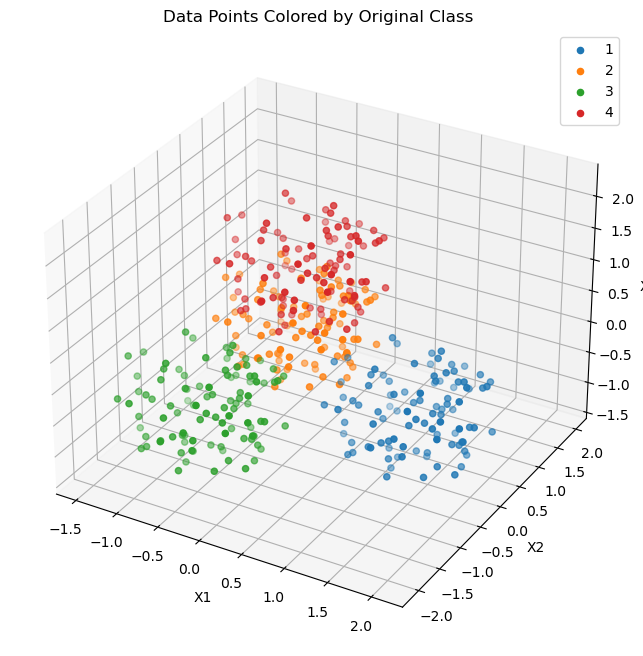

In [78]:
data =  pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/Data3.csv')

# Extract features and class column
features = data[['X1', 'X2', 'X3']]
class_labels = data['Class']

# Create a 3D scatter plot with colors based on class labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in class_labels.unique():
    ax.scatter(features[class_labels == label]['X1'], features[class_labels == label]['X2'],
               features[class_labels == label]['X3'], label=label)

ax.set_title('Data Points Colored by Original Class')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()
plt.show()


### For Data 4

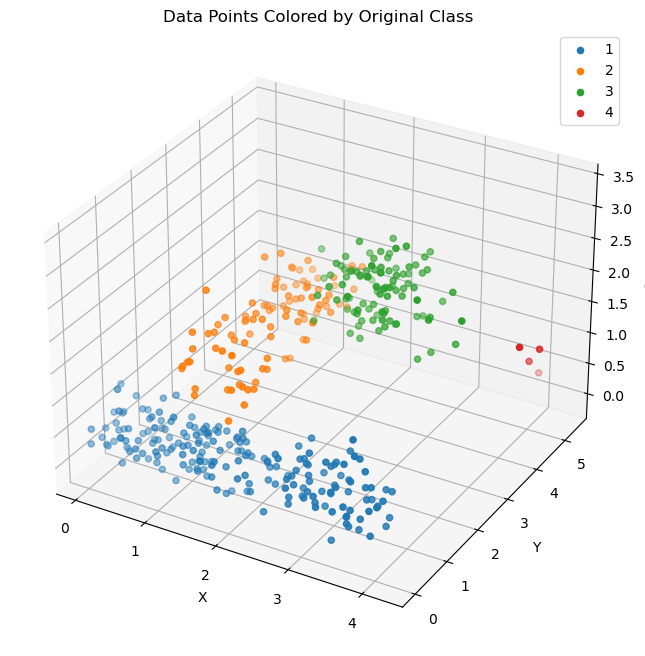

In [79]:
data = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/Data4.csv')

# Extract features and class column
features = data[['X', 'Y', 'C']]
class_labels = data['Class']

# Create a 3D scatter plot with colors based on class labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in class_labels.unique():
    ax.scatter(features[class_labels == label]['X'], features[class_labels == label]['Y'],
               features[class_labels == label]['C'], label=label)

ax.set_title('Data Points Colored by Original Class')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('C')
ax.legend()
plt.show()


### For Data 5

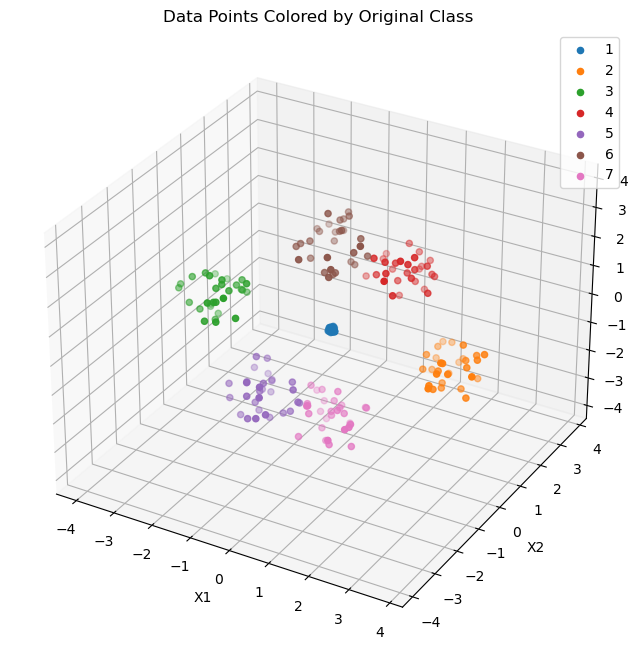

In [80]:
data = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project-1/Data5.csv')

# Extract features and class column
features = data[['X1', 'X2', 'X3']]  
class_labels = data['Class']

# Create a 3D scatter plot with colors based on class labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in class_labels.unique():
    ax.scatter(features[class_labels == label]['X1'], features[class_labels == label]['X2'],
               features[class_labels == label]['X3'], label=label)

ax.set_title('Data Points Colored by Original Class')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()
plt.show()


### Plotting the K means and hierarchical clustering for the corresponding datasets

### For Data 1

In [81]:
data1.head()

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,1
1,2,-44.460120,20.964670,-11.492060,1
2,3,50.001020,0.780748,9.134460,1
3,4,-41.699080,-22.310060,16.314120,1
4,5,4.425242,-4.666664,50.223740,1


### Elbow Plot

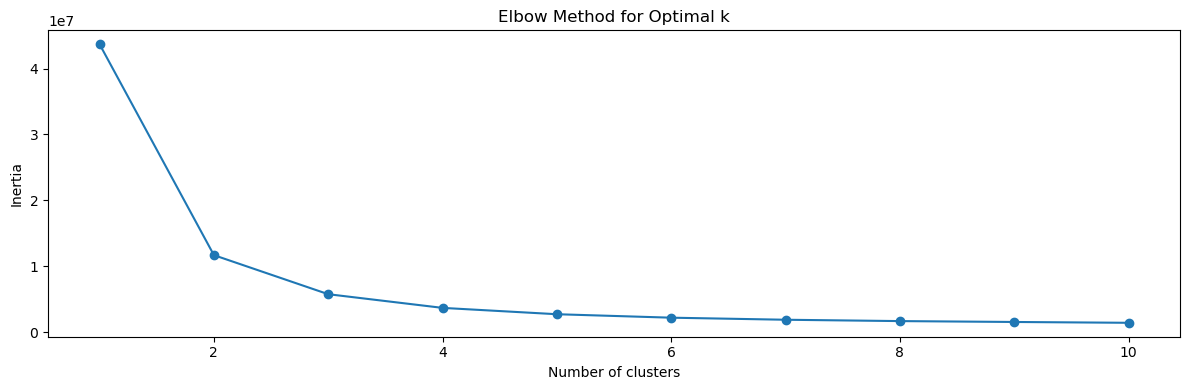

In [82]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
ch_coeffs = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data1)
    inertias.append(kmeans.inertia_)
    if k > 1:
        silhouettes.append(metrics.silhouette_score(data1, kmeans.labels_))
        ch_coeffs.append(metrics.calinski_harabasz_score(data1, kmeans.labels_))

plt.figure(figsize=(12, 4))

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.tight_layout()
plt.show()


From the Elbow plot, we can infer that the number of clusters is 3 as there is a gradual decrease afterwards.

### Dendrograms

In [117]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

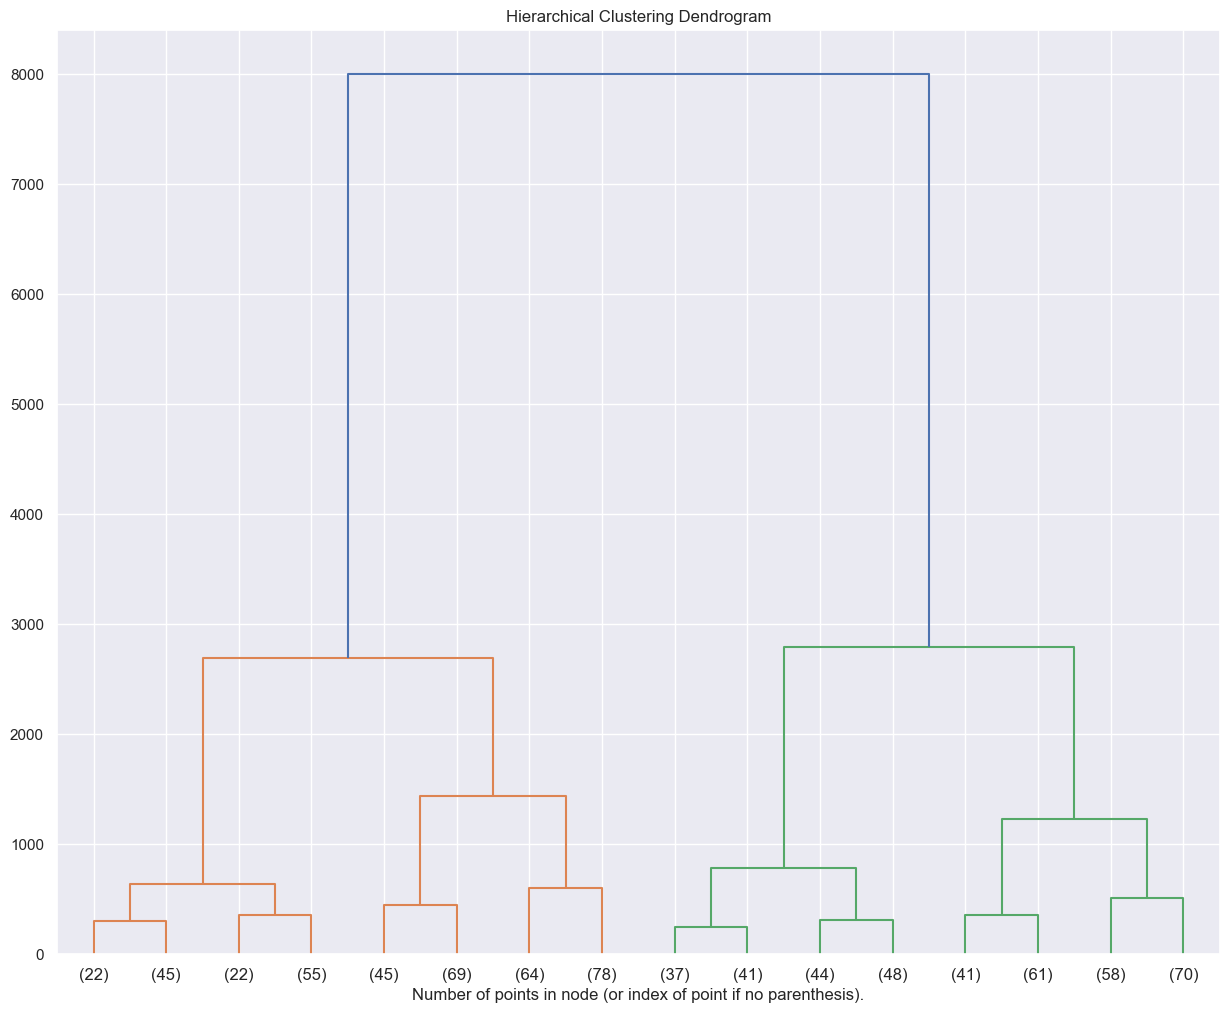

In [118]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data1.drop(columns=["Class"]))
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

According to the tree map,we have considered the cluster number to be 4.

### Plotting the Clustering methods - Data 1

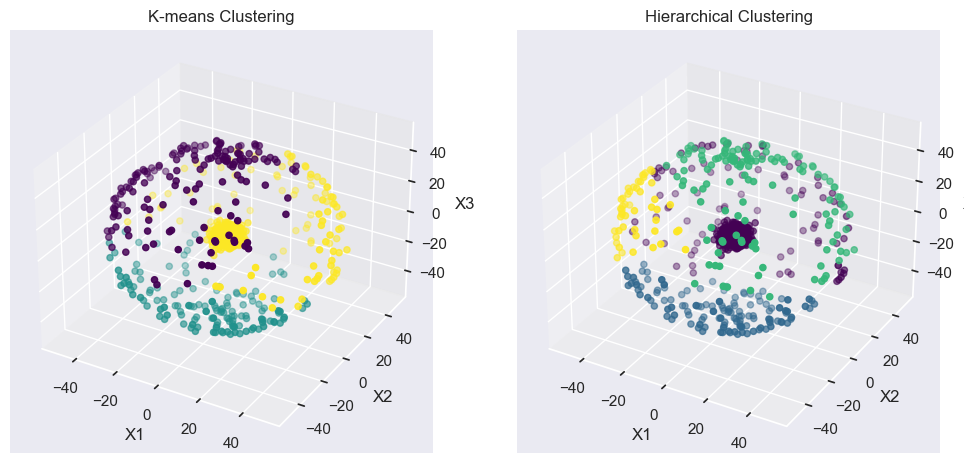

In [119]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Extract features and class column
features = data1[['X1', 'X2', 'X3']]
class_labels = data1['Class']

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Set the number of clusters (K)
kmeans.fit(features)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)  # Number of clusters is not required
hierarchical.fit(features)

# Visualize data points and clusters in 3D
fig = plt.figure(figsize=(12, 6))

# K-means Clustering
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(features['X1'], features['X2'], features['X3'], c=kmeans.labels_, cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')

# Hierarchical Clustering
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(features['X1'], features['X2'], features['X3'], c=hierarchical.labels_, cmap='viridis')
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('X3')

plt.show()


### Calculating the external validation metrics

In [120]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

ari_score_kmeans = adjusted_rand_score(class_labels, kmeans.labels_)
nmi_score_kmeans = normalized_mutual_info_score(class_labels, kmeans.labels_)
fmi_score_kmeans = fowlkes_mallows_score(class_labels, kmeans.labels_)

print("KMeans Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", ari_score_kmeans)
print("Normalized Mutual Information (NMI):", nmi_score_kmeans)
print("Fowlkes-Mallows Index (FMI):", fmi_score_kmeans)

ari_score_hierarchical = adjusted_rand_score(class_labels, hierarchical.labels_)
nmi_score_hierarchical = normalized_mutual_info_score(class_labels, hierarchical.labels_)
fmi_score_hierarchical = fowlkes_mallows_score(class_labels, hierarchical.labels_)

print("\nHierarchical Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", ari_score_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_score_hierarchical)
print("Fowlkes-Mallows Index (FMI):", fmi_score_hierarchical)



KMeans Clustering Evaluation:
Adjusted Rand Index (ARI): 0.4106681061804549
Normalized Mutual Information (NMI): 0.4633492157384898
Fowlkes-Mallows Index (FMI): 0.6949341163470986

Hierarchical Clustering Evaluation:
Adjusted Rand Index (ARI): 0.4080056547514486
Normalized Mutual Information (NMI): 0.4528403503582729
Fowlkes-Mallows Index (FMI): 0.6845264083443159


The Jaccard coefficient assesses the similarity of the detected clusters C to the provided partition P : J = T P/（TP + FP + FN） The Rand coefficient is similar to the Jaccard coefficient, yet it is measured against the total data set (equivalent to accuracy in a supervised machine learning setting): Rand = （TP + TN）/M The Folkes and Mallows coefficient computes the similarity between the clusters found by the algorithm with respect to the independent markers: FM ='sqrt{TP/（TP + FP） ∗ TP/（TP + FN）}'

According to the external validation metrics indexs of two different clustering models. It can be concluded that K-Means clustering is better than hierarchical clustering for this dataset (Data 1)

### Data 2

### Elbow plot for Data 2

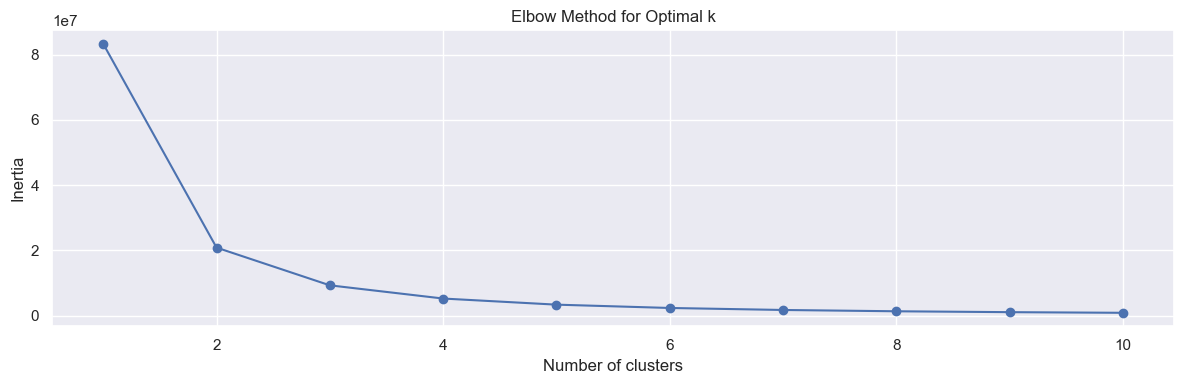

In [121]:
inertias = []
silhouettes = []
ch_coeffs = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data2)
    inertias.append(kmeans.inertia_)
    if k > 1:
        silhouettes.append(metrics.silhouette_score(data2, kmeans.labels_))
        ch_coeffs.append(metrics.calinski_harabasz_score(data2, kmeans.labels_))

plt.figure(figsize=(12, 4))

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.tight_layout()
plt.show()



From the Elbow plot, we can determine that the number of clusters is 3

### Setting up the Dendrogram 

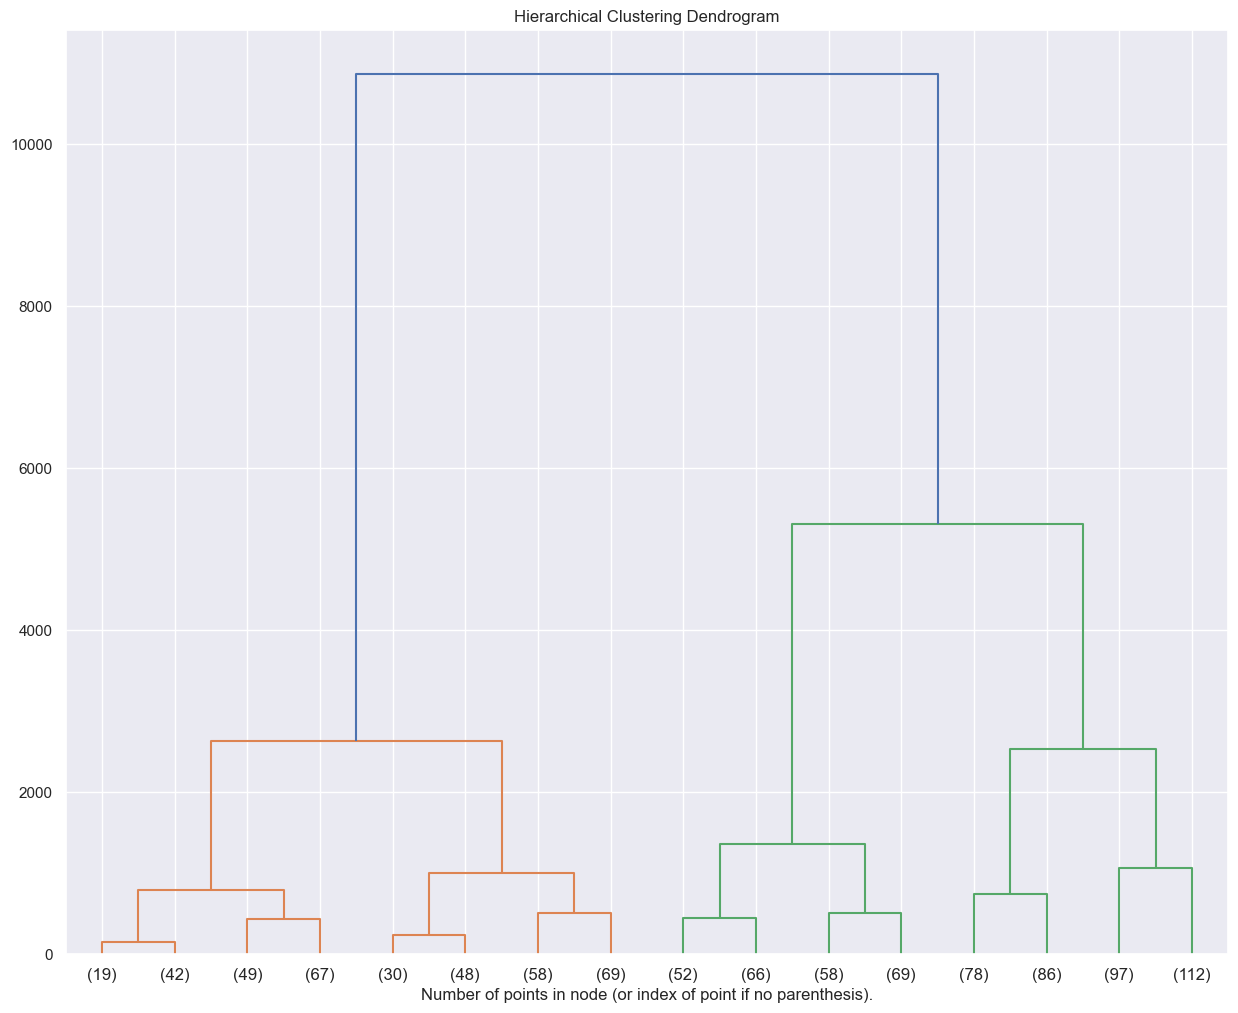

In [122]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data2.drop(columns=["Class"]))
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

According to the tree map,It can be said that the cluster number to be 4.

### Plotting the K-means and Hierarchial Clustering

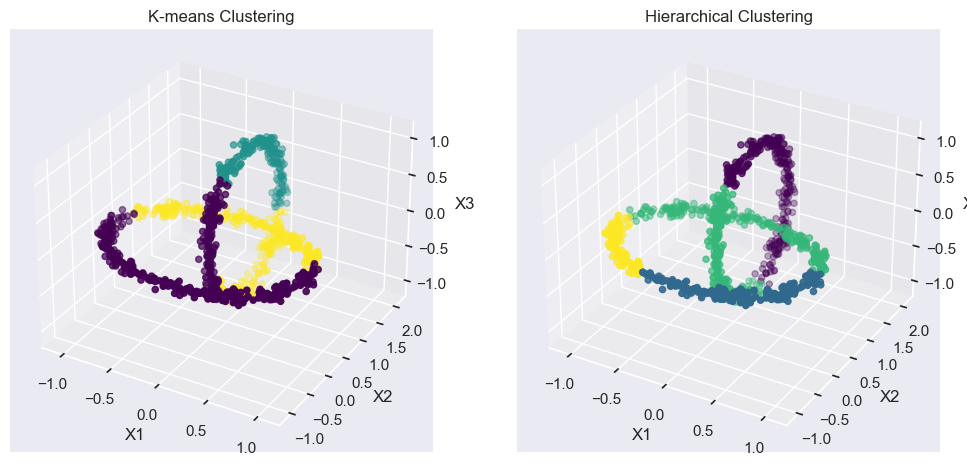

In [123]:
features = data2[['X1', 'X2', 'X3']]
class_labels = data2['Class']

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Set the number of clusters (K)
kmeans.fit(features)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)  # Number of clusters is not required
hierarchical.fit(features)

# Visualize data points and clusters in 3D
fig = plt.figure(figsize=(12, 6))

# K-means Clustering
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(features['X1'], features['X2'], features['X3'], c=kmeans.labels_, cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')

# Hierarchical Clustering
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(features['X1'], features['X2'], features['X3'], c=hierarchical.labels_, cmap='viridis')
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('X3')

plt.show()

### Calculating the external validation metrics

In [125]:


# Assuming you have class_labels, kmeans.labels_, and hierarchical.labels_ defined earlier

ari_score_kmeans = adjusted_rand_score(class_labels, kmeans.labels_)
nmi_score_kmeans = normalized_mutual_info_score(class_labels, kmeans.labels_)
fmi_score_kmeans = fowlkes_mallows_score(class_labels, kmeans.labels_)

print("KMeans Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", ari_score_kmeans)
print("Normalized Mutual Information (NMI):", nmi_score_kmeans)
print("Fowlkes-Mallows Index (FMI):", fmi_score_kmeans)

ari_score_hierarchical = adjusted_rand_score(class_labels, hierarchical.labels_)
nmi_score_hierarchical = normalized_mutual_info_score(class_labels, hierarchical.labels_)
fmi_score_hierarchical = fowlkes_mallows_score(class_labels, hierarchical.labels_)

print("\nHierarchical Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", ari_score_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_score_hierarchical)
print("Fowlkes-Mallows Index (FMI):", fmi_score_hierarchical)


KMeans Clustering Evaluation:
Adjusted Rand Index (ARI): 0.1314485018204663
Normalized Mutual Information (NMI): 0.1902323512672521
Fowlkes-Mallows Index (FMI): 0.5060131368803138

Hierarchical Clustering Evaluation:
Adjusted Rand Index (ARI): 0.23294618063755
Normalized Mutual Information (NMI): 0.3978039116399651
Fowlkes-Mallows Index (FMI): 0.539561356994794


The Jaccard coefficient assesses the similarity of the detected clusters C to the provided partition P :
J = T P/（TP + FP + FN）
The Rand coefficient is similar to the Jaccard coefficient, yet it
is measured against the total data set (equivalent to accuracy
in a supervised machine learning setting):
Rand = （TP + TN）/M
The Folkes and Mallows coefficient computes the similarity
between the clusters found by the algorithm with respect to the
independent markers:
FM ='sqrt{TP/（TP + FP） ∗ TP/（TP + FN）}'

According to the external validation metrics indexes of two different clustering models, We can find that hierarchical clustering is better than k-means clustering in this dataset

### Data 3

### Elbow Plot for Data 3

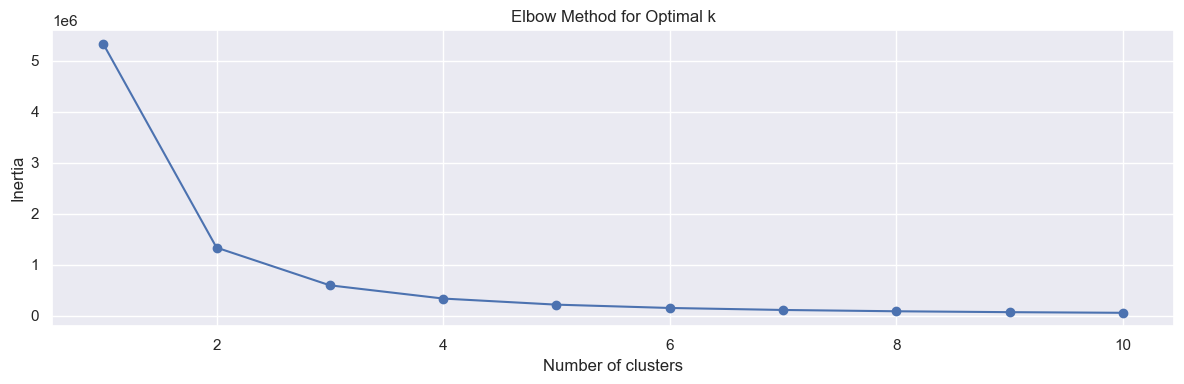

In [126]:
inertias = []
silhouettes = []
ch_coeffs = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data3)
    inertias.append(kmeans.inertia_)
    if k > 1:
        silhouettes.append(metrics.silhouette_score(data3, kmeans.labels_))
        ch_coeffs.append(metrics.calinski_harabasz_score(data3, kmeans.labels_))

plt.figure(figsize=(12, 4))

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.tight_layout()
plt.show()

From the Elbow plot, we can determine that the number of clusters is 3

### Dendrogram for Data 3

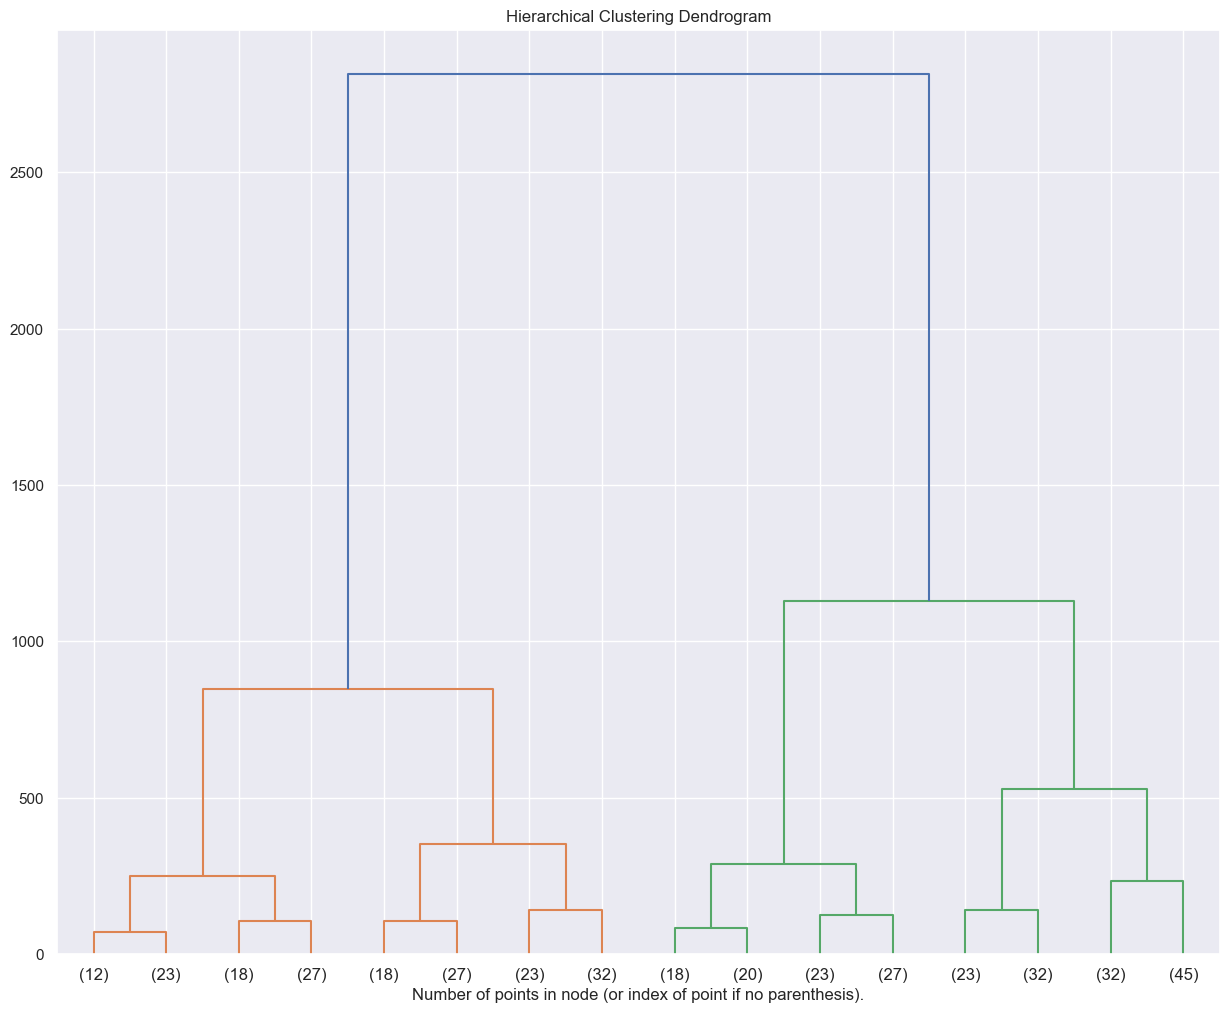

In [127]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data3.drop(columns=["Class"]))
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

According to the tree map, It can be derieved that the cluster number to be 4.

### Plotting K-means and Hierarchial clustering for Data 3

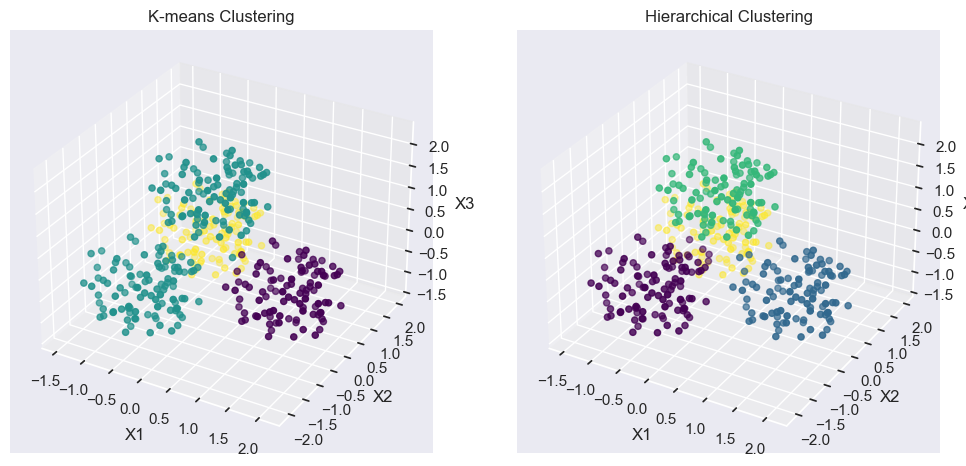

In [128]:
features = data3[['X1', 'X2', 'X3']]
class_labels = data3['Class']

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Set the number of clusters (K)
kmeans.fit(features)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)  # Number of clusters is not required
hierarchical.fit(features)

# Visualize data points and clusters in 3D
fig = plt.figure(figsize=(12, 6))

# K-means Clustering
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(features['X1'], features['X2'], features['X3'], c=kmeans.labels_, cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')

# Hierarchical Clustering
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(features['X1'], features['X2'], features['X3'], c=hierarchical.labels_, cmap='viridis')
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('X3')

plt.show()

### Calculating the external validation metrics

In [129]:

ari_score_kmeans = adjusted_rand_score(class_labels, kmeans.labels_)
nmi_score_kmeans = normalized_mutual_info_score(class_labels, kmeans.labels_)
fmi_score_kmeans = fowlkes_mallows_score(class_labels, kmeans.labels_)

print("KMeans Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", ari_score_kmeans)
print("Normalized Mutual Information (NMI):", nmi_score_kmeans)
print("Fowlkes-Mallows Index (FMI):", fmi_score_kmeans)

ari_score_hierarchical = adjusted_rand_score(class_labels, hierarchical.labels_)
nmi_score_hierarchical = normalized_mutual_info_score(class_labels, hierarchical.labels_)
fmi_score_hierarchical = fowlkes_mallows_score(class_labels, hierarchical.labels_)

print("\nHierarchical Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", ari_score_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_score_hierarchical)
print("Fowlkes-Mallows Index (FMI):", fmi_score_hierarchical)


KMeans Clustering Evaluation:
Adjusted Rand Index (ARI): 0.7045857598624213
Normalized Mutual Information (NMI): 0.8447668705949729
Fowlkes-Mallows Index (FMI): 0.8096788954364936

Hierarchical Clustering Evaluation:
Adjusted Rand Index (ARI): 0.9672676330087653
Normalized Mutual Information (NMI): 0.9639667391957355
Fowlkes-Mallows Index (FMI): 0.9753945158961902


According to the external validation metrics indexes of two different clustering models, We can find that hierarchical clustering is better than k-means clustering in this dataset

### Data 4

### Elbow plot for Data 4

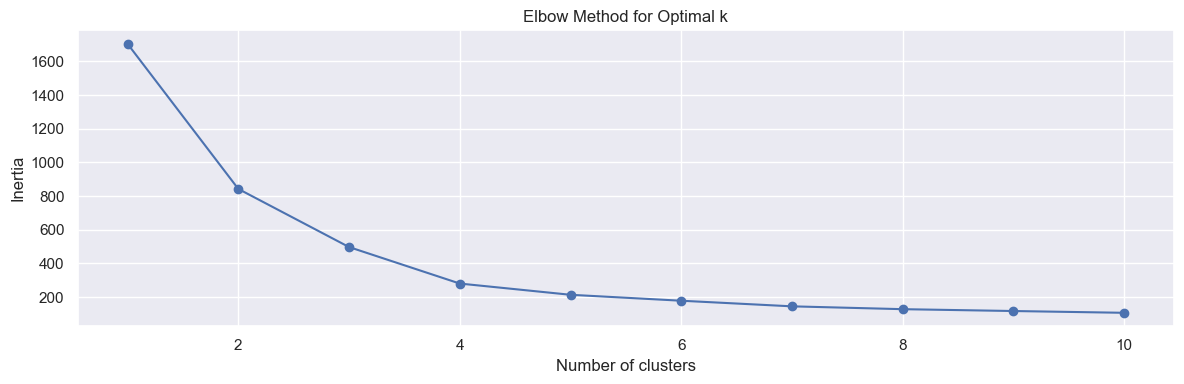

In [130]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
ch_coeffs = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data4[['X', 'Y', 'C']])  # Using columns 'A', 'B', and 'C' for clustering
    inertias.append(kmeans.inertia_)
    if k > 1:
        silhouettes.append(metrics.silhouette_score(data4[['X', 'Y', 'C']], kmeans.labels_))
        ch_coeffs.append(metrics.calinski_harabasz_score(data4[['X', 'Y', 'C']], kmeans.labels_))

plt.figure(figsize=(12, 4))

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.tight_layout()
plt.show()


From the Elbow plot, It can be determined that the number of clusters is 4

### Dendrogram for Data 4

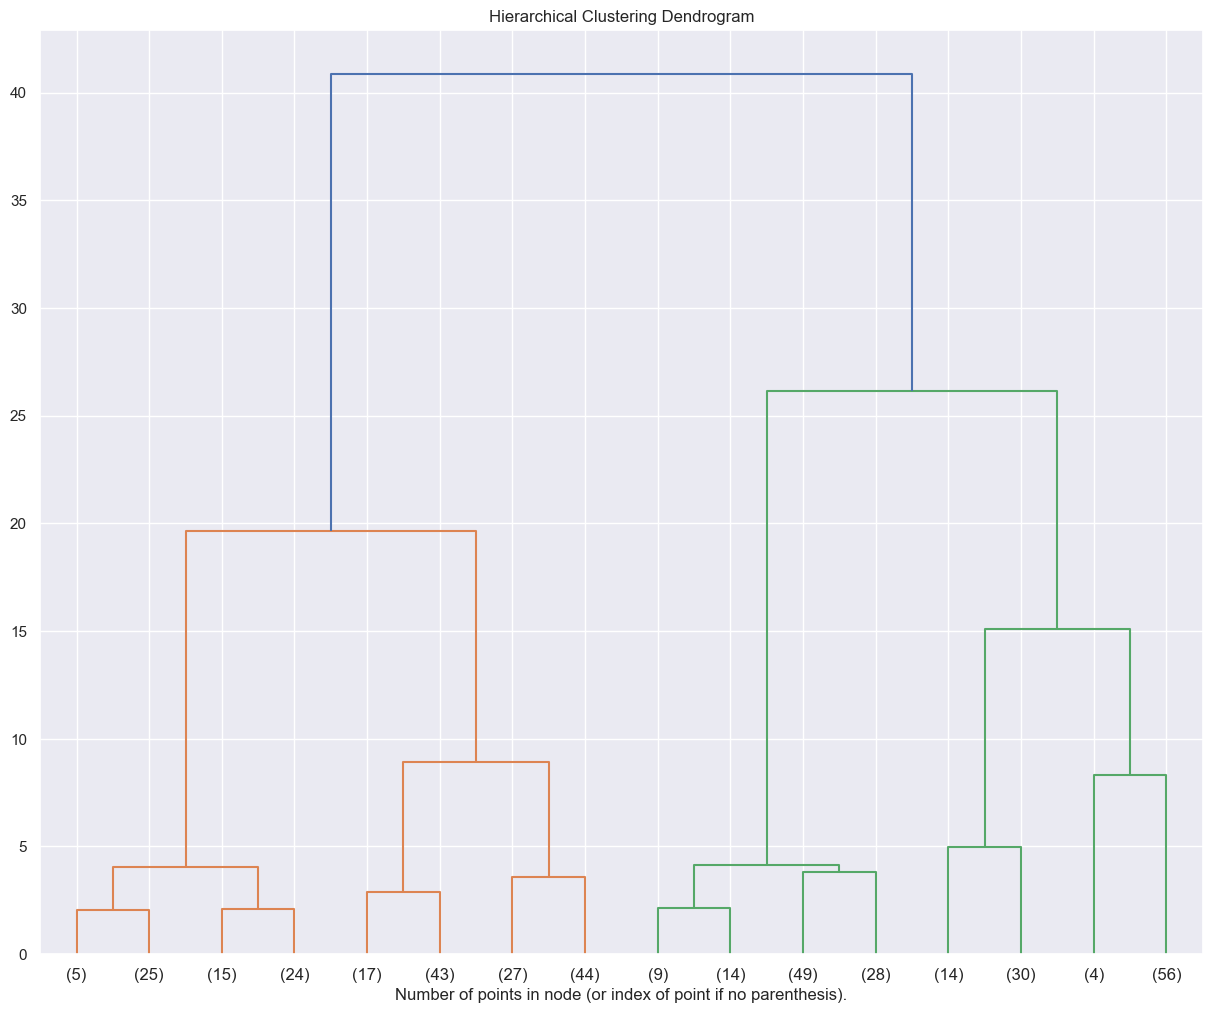

In [131]:
# use AgglomerativeClustering to clusting
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# to choice X.Y.C of dataset to clusting
model = model.fit(data4[['X', 'Y', 'C']])

plt.figure(figsize=(15, 12))
plt.title("Hierarchical Clustering Dendrogram")

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


According to the tree map, It can be determined that the cluster number to 4.

### Plotting for K-means and Hierarchical - Data 4

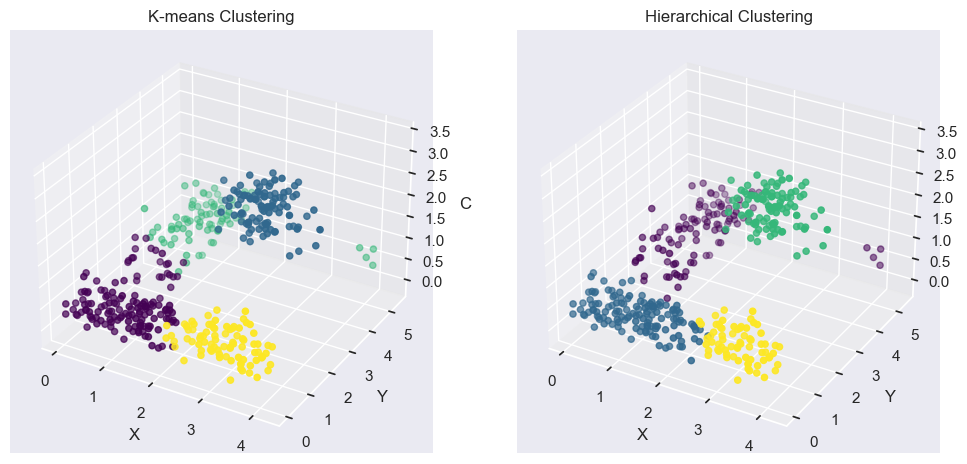

In [132]:
features = data4[['X', 'Y', 'C']]
class_labels = data4['Class']

# Apply K-means clustering
kmeans = KMeans(n_clusters=4)  # Set the number of clusters (K)
kmeans.fit(features)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)  # Number of clusters is not required
hierarchical.fit(features)

# Visualize data points and clusters in 3D
fig = plt.figure(figsize=(12, 6))

# K-means Clustering
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(features['X'], features['Y'], features['C'], c=kmeans.labels_, cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('C')

# Hierarchical Clustering
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(features['X'], features['Y'], features['C'], c=hierarchical.labels_, cmap='viridis')
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('C')

plt.show()

### Calculating the external validation metrics

In [133]:

ari_score_kmeans = adjusted_rand_score(class_labels, kmeans.labels_)
nmi_score_kmeans = normalized_mutual_info_score(class_labels, kmeans.labels_)
fmi_score_kmeans = fowlkes_mallows_score(class_labels, kmeans.labels_)

print("KMeans Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", ari_score_kmeans)
print("Normalized Mutual Information (NMI):", nmi_score_kmeans)
print("Fowlkes-Mallows Index (FMI):", fmi_score_kmeans)

ari_score_hierarchical = adjusted_rand_score(class_labels, hierarchical.labels_)
nmi_score_hierarchical = normalized_mutual_info_score(class_labels, hierarchical.labels_)
fmi_score_hierarchical = fowlkes_mallows_score(class_labels, hierarchical.labels_)

print("\nHierarchical Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", ari_score_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_score_hierarchical)
print("Fowlkes-Mallows Index (FMI):", fmi_score_hierarchical)


KMeans Clustering Evaluation:
Adjusted Rand Index (ARI): 0.5877644016112638
Normalized Mutual Information (NMI): 0.725466545289371
Fowlkes-Mallows Index (FMI): 0.7237292929817782

Hierarchical Clustering Evaluation:
Adjusted Rand Index (ARI): 0.7339089891331867
Normalized Mutual Information (NMI): 0.8524992516385659
Fowlkes-Mallows Index (FMI): 0.8267843729687627


According to the external validation metrics indexes of two different clustering models, We can find that hierarchical clustering is better than k-means clustering in this dataset

### Data 5

### Elbow plot for Data 5

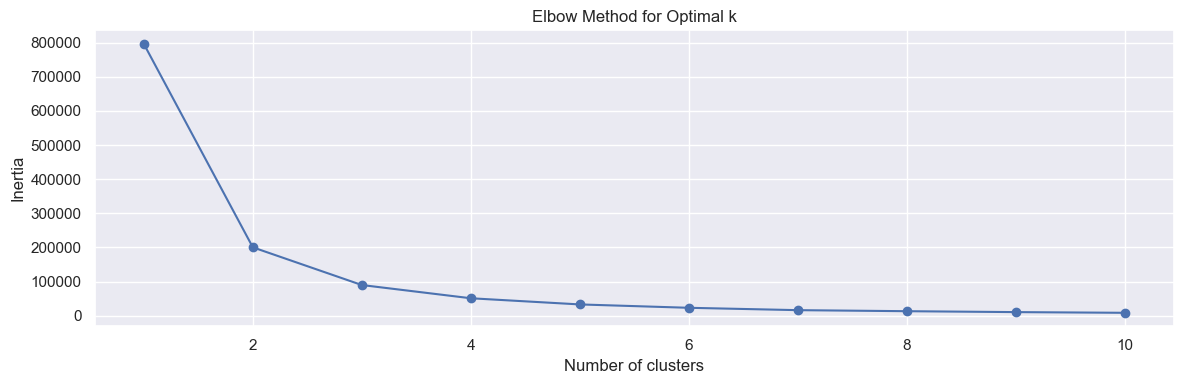

In [134]:
inertias = []
silhouettes = []
ch_coeffs = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data5)
    inertias.append(kmeans.inertia_)
    if k > 1:
        silhouettes.append(metrics.silhouette_score(data5, kmeans.labels_))
        ch_coeffs.append(metrics.calinski_harabasz_score(data5, kmeans.labels_))

plt.figure(figsize=(12, 4))

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.tight_layout()
plt.show()

From the Elbow plot, we can determine that the number of clusters is 3

### Plotting Dendrogram for Data 5

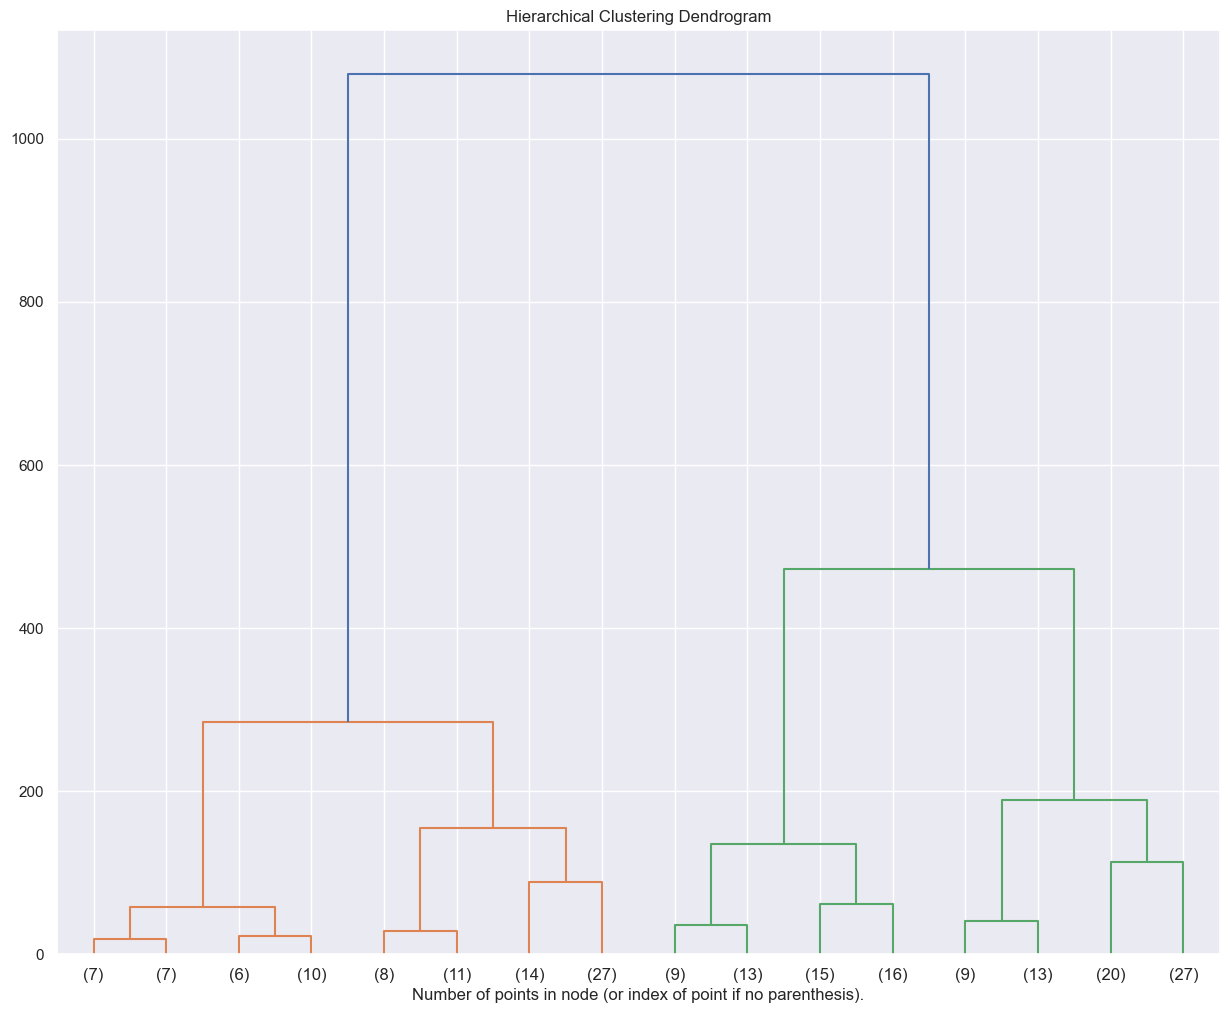

In [135]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data5.drop(columns=["Class"]))
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

According to the tree map, It can be infered that the cluster number to 4.

### Plotting k-means and hierarchial Cluster 

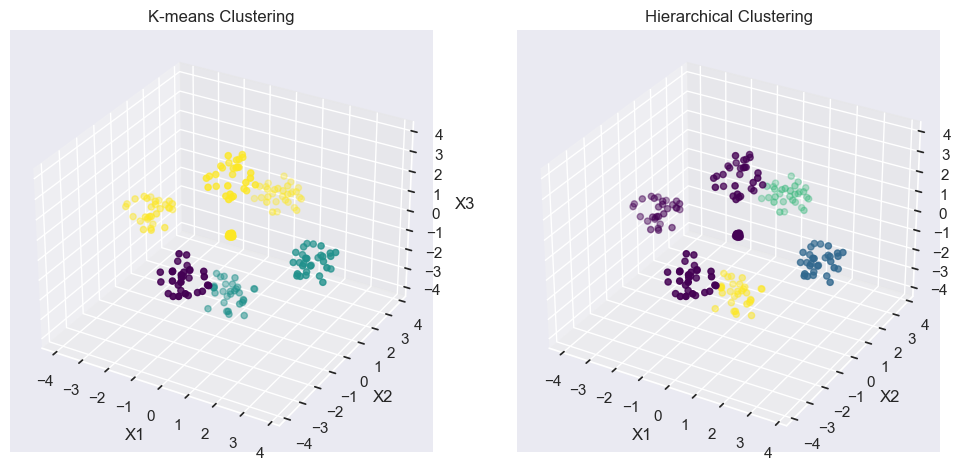

In [136]:
features = data5[['X1', 'X2', 'X3']]
class_labels = data5['Class']

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Set the number of clusters (K)
kmeans.fit(features)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4) 
hierarchical.fit(features)

# Visualize data points and clusters in 3D
fig = plt.figure(figsize=(12, 6))

# K-means Clustering
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(features['X1'], features['X2'], features['X3'], c=kmeans.labels_, cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')

# Hierarchical Clustering
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(features['X1'], features['X2'], features['X3'], c=hierarchical.labels_, cmap='viridis')
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('X3')

plt.show()

### External Validation Metrics

In [138]:
#calculation of external validation metrics
ari_score_kmeans = adjusted_rand_score(class_labels, kmeans.labels_)
nmi_score_kmeans = normalized_mutual_info_score(class_labels, kmeans.labels_)
fmi_score_kmeans = fowlkes_mallows_score(class_labels, kmeans.labels_)

print("KMeans Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", ari_score_kmeans)
print("Normalized Mutual Information (NMI):", nmi_score_kmeans)
print("Fowlkes-Mallows Index (FMI):", fmi_score_kmeans)

ari_score_hierarchical = adjusted_rand_score(class_labels, hierarchical.labels_)
nmi_score_hierarchical = normalized_mutual_info_score(class_labels, hierarchical.labels_)
fmi_score_hierarchical = fowlkes_mallows_score(class_labels, hierarchical.labels_)

print("\nHierarchical Clustering Evaluation:")
print("Adjusted Rand Index (ARI):", ari_score_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_score_hierarchical)
print("Fowlkes-Mallows Index (FMI):", fmi_score_hierarchical)


KMeans Clustering Evaluation:
Adjusted Rand Index (ARI): 0.3539095574806536
Normalized Mutual Information (NMI): 0.6570523040240902
Fowlkes-Mallows Index (FMI): 0.5692224410163057

Hierarchical Clustering Evaluation:
Adjusted Rand Index (ARI): 0.40508709880579136
Normalized Mutual Information (NMI): 0.74220817973076
Fowlkes-Mallows Index (FMI): 0.5979857201328858


According to the external validation metrics indexs of two different clusting models. We can find that hierarchical clustering is doing better than K-Means.

### Task-2

In [83]:
#Cross verification of the dataset
display(world_data_df.head())

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [84]:
#taking a backup of the original data
world_data=world_data_df.copy()

#### Data Cleaning/Pre processing

In [85]:
#Converting the required field by striping the '%' symbol
world_data['Business Tax Rate'] = world_data['Business Tax Rate'].str.rstrip('%').astype('float') / 100.0

# Converting the 'GDP' column to numeric (remove commas and dollar signs)
world_data['GDP'] = world_data['GDP'].replace('[\$,]', '', regex=True).astype(float)

# Converting the Health Exp/Capita column
world_data['Health Exp/Capita']=world_data['Health Exp/Capita'].str.replace('$', '')
world_data['Health Exp/Capita']=world_data['Health Exp/Capita'].str.replace(',', '').astype(float)


In [86]:

# using the LabelEncoder function to transform unordered catagorical data 
le = LabelEncoder()

# Encoding 'Region' column
world_data['Region'] = le.fit_transform(world_data['Region'])

# Encoding 'Country' column
world_data['Country'] = le.fit_transform(world_data['Country'])


In [87]:
nan_indices = np.isnan(world_data)
print("Number of NaN values:", np.sum(nan_indices))

Number of NaN values: Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64


In [88]:
# Filling in the null values with the mean of their respective columns
world_data.fillna(method='pad', inplace=True)

#Rechecking the if all the null values have been filled
nan_indices = np.isnan(world_data)
print("Number of NaN values:", np.sum(nan_indices))

Number of NaN values: Birth Rate                0
Business Tax Rate         0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Urban          0
Region                    0
Country                   0
dtype: int64


In [89]:
display(world_data)

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,0.720,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,0,2
1,0.046,0.521,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,0,5
2,0.037,0.659,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,0.188,60.0,58.0,0.8,0.432,0.539,0.029,0.423,0,20
3,0.024,0.195,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,0,25
4,0.042,0.435,13.0,2215.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,0.110,56.0,55.0,0.5,0.458,0.517,0.025,0.265,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.015,0.291,41.0,20918.0,2.367635e+10,0.053,935.0,210.0,0.020,0.6,0.080,73.0,66.0,1.4,0.207,0.708,0.085,0.907,5,193
204,0.013,0.465,5.0,2191193.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,5,198
205,0.015,0.419,7.0,4430.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,5,199
206,0.020,0.628,141.0,70198.0,3.164822e+11,0.045,487.0,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,5,202


In [90]:
#taking into consideration only the numeric columns
numeric_world_columns = world_data.select_dtypes(include=['number']).columns

# using StandardScaler function to scale
scaler = StandardScaler()
# Scaling and transforming all the numeric columns under one roof
world_data[numeric_world_columns] = scaler.fit_transform(world_data[numeric_world_columns])
# Below is the structure of the data after scaling and standardisation
display(world_data.head())

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.328101,0.815541,-0.103243,-0.137616,-0.125323,-0.821118,-0.460056,0.746554,-0.134639,-0.997783,-0.553771,-0.098672,0.092954,-0.130185,-0.092152,0.620693,-0.622868,0.436639,-1.175566,-1.690435
1,2.307580,0.232762,0.657081,-0.246906,-0.196395,-1.166503,-0.490066,0.032346,3.279597,-0.997783,0.754591,-2.010198,-2.080749,-1.055943,1.827414,-1.992402,-1.052977,-0.681169,-1.175566,-1.640471
2,1.459232,0.636900,-0.029065,-0.284842,-0.268864,-0.786580,-0.568636,-0.018367,1.369251,-1.354992,0.754591,-1.305951,-1.165505,-0.361624,1.406046,-1.418095,-0.959475,-0.623845,-1.175566,-1.390653
3,0.233840,-0.721940,0.545814,-0.290817,-0.262878,-0.544811,-0.366754,-0.517045,0.515692,-0.997783,-0.190337,-2.714444,-2.423965,1.258452,0.544582,-0.183336,-0.847273,-0.042422,-1.175566,-1.307380
4,1.930536,-0.019092,-0.325777,-0.290817,-0.266543,-0.130349,-0.565908,-0.018367,1.694416,-1.354992,-0.190337,-1.708378,-1.508722,-1.055943,1.649503,-1.733964,-1.034277,-1.270782,-1.175566,-1.240762


### Plotting of the Elbow Plot

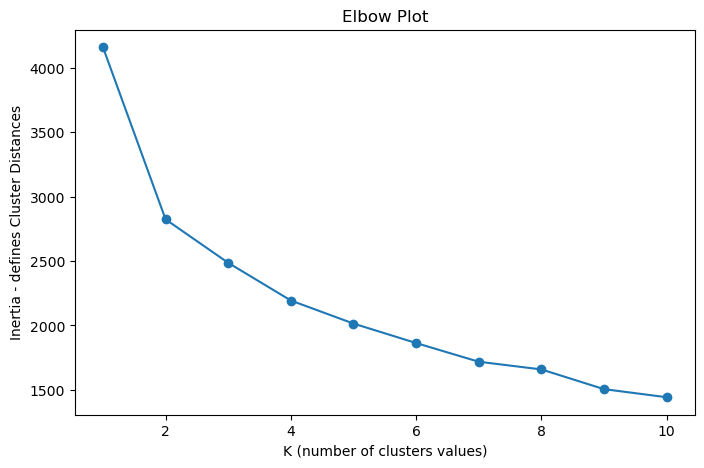

In [91]:
inertias = []
silhouettes = []
ch_coeffs = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(world_data)
    inertias.append(kmeans.inertia_)
    if k > 1:
      silhouettes.append(metrics.silhouette_score(world_data, kmeans.labels_))
      ch_coeffs.append(metrics.calinski_harabasz_score(world_data, kmeans.labels_))

#Determining the cluster value using Elbow plot

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertias , marker='o')
plt.xlabel("K (number of clusters values)")
plt.ylabel("Inertia - defines Cluster Distances")
plt.title("Elbow Plot")
plt.show()

Insights: Eventhough the elbow is formed at k=2, it is not advisable as it might over-simplify the underlying patterns in the data and thereby high chances of ignoring crucial data patterns. Therefore, our K-means cluster value is 8 since the trajectory of the graph substancially flattens out after k=8

### Plotting the dendrogram

In [30]:
# Plotting Function
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

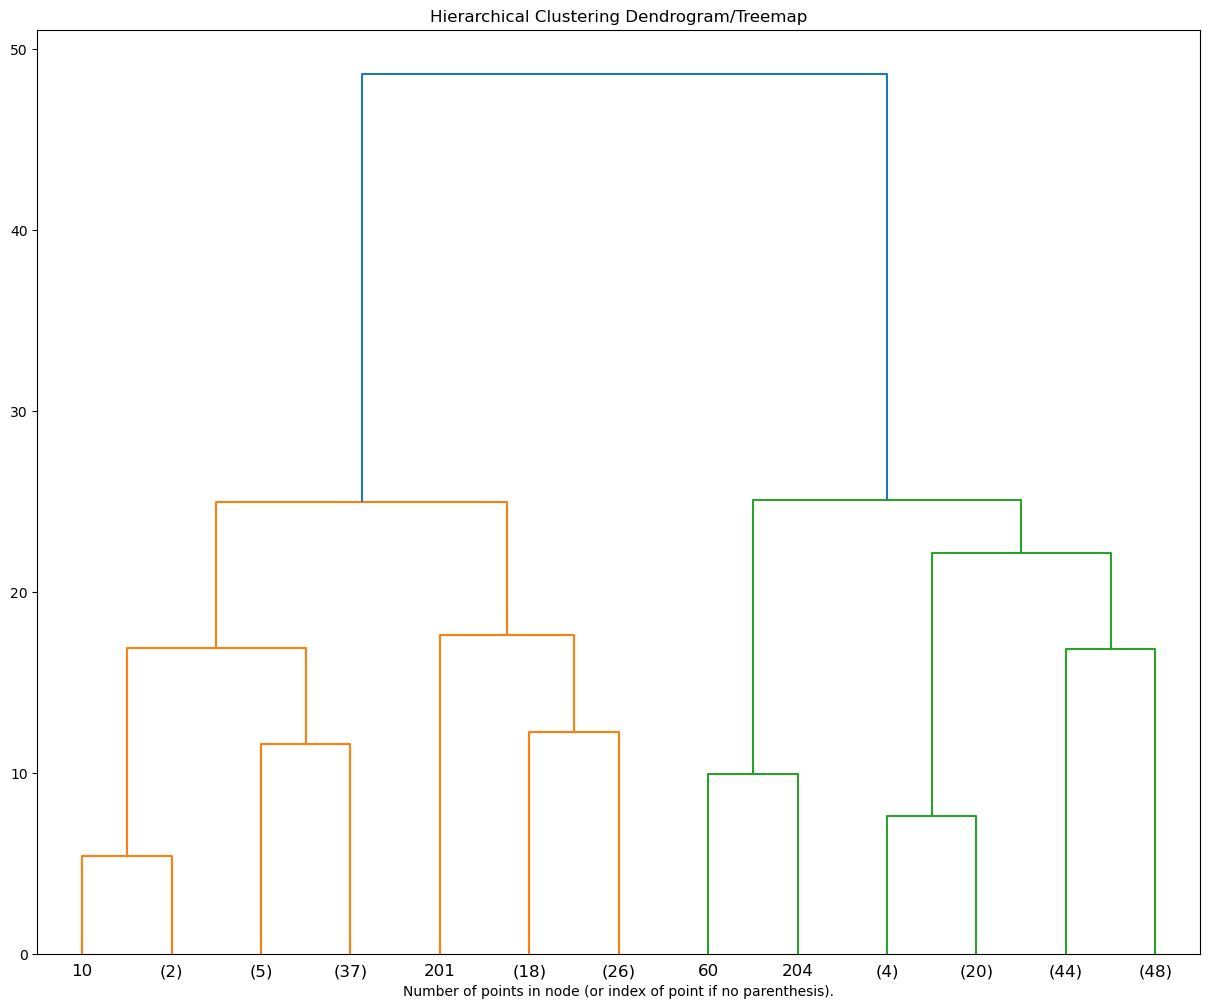

In [96]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(world_data)
plt.figure(figsize=(15,12))
plt.title("Hierarchical Clustering Dendrogram/Treemap")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Insights: Cutting through the treeplot, we are able to derieve at the number of cluster values to be 4.

### Calculation of Internal Validation Metrics

### Calculating the Silhouette score - K-means

In [49]:
#defining a function to create the formulae
def calculate_silhouette_coeff_formulae():
    formula = "s(i) = (b(i) - a(i)) / max(b(i), a(i))"
    print(f"The formula for calculating the silhouette coefficient is:\n\n{formula}")

# Calling the function to print the formula
calculate_silhouette_coeff_formulae()


The formula for calculating the silhouette coefficient is:

s(i) = (b(i) - a(i)) / max(b(i), a(i))


a(i)--is the average distance between a sample and all other points inside a cluster
b(i)--is the average distance between a sample and all other points in the next nearest cluster
max(a(i),b(i))--is the maximum value of either a(i) or b(i).

Generally, the main use of calculating the Silhouette score, as it is the most commmon way to combine the cohesion and seperation in the single measure.

In [92]:
#Based on our elbow the no.of clusters is to be 8
kmeans_task=KMeans(n_clusters=8)
#building a model from training data and assigning label to the data
labels_k=kmeans_task.fit_predict(world_data)
#Silhouette score
silhouette_avg_kmeans = silhouette_score(world_data, labels_k)
print(f"Silhouette Score for K-means Clustering: {silhouette_avg_kmeans}")


Silhouette Score for K-means Clustering: 0.15262899384475073


### Calculating the Calinski-Harabasz coefficient - K means

In [51]:
#Creating a definition for the Calinski-Harabasz coefficient
def calculate_CH_coeff_formulae():
    CH_formula = "CH = B(k) / W(k) * (N - k) / (k - 1)"
    print(f"The formula for calculating the Calinski-Harabasz Index is:\n\n{CH_formula}")

# Calling the function to print the formula
calculate_CH_coeff_formulae()

The formula for calculating the Calinski-Harabasz Index is:

CH = B(k) / W(k) * (N - k) / (k - 1)


Where: B(k) is the between-cluster variance.
W(k) is the within-cluster variance.
N is the total number of data points.
k is the number of clusters.

In [93]:
#Calinski-Harabasz score
ch_index = calinski_harabasz_score(world_data, labels_k)
print(f"Calinski-Harabasz Index for K-means Clustering: {ch_index}")

Calinski-Harabasz Index for K-means Clustering: 44.38952091654761


### Calculating the Davies Bouldin Score- K means

In [97]:
#Davies Bouldin score
db_index = davies_bouldin_score(world_data, labels_k)
print(f"Davies-Bouldin Index for K-means Clustering: {db_index}")

Davies-Bouldin Index for K-means Clustering: 1.494373986729785


### Calculating Silhouette Score - Hierarchical Clustering

In [42]:
#defining a function to create the formulae
def calculate_silhouette_coeff_formulae():
    formula = "s(i) = (b(i) - a(i)) / max(b(i), a(i))"
    print(f"The formula for calculating the silhouette coefficient is:\n\n{formula}")

# Calling the function to print the formula
calculate_silhouette_coeff_formulae()

print(f"Generally, the main use of calculating the Silhouette score, as it is the most commmon way to combine the cohesion and seperation in the single measure.")

The formula for calculating the silhouette coefficient is:

s(i) = (b(i) - a(i)) / max(b(i), a(i))
Generally, the main use of calculating the Silhouette score, as it is the most commmon way to combine the cohesion and seperation in the single measure.


In [98]:
#Based on our tree the no.of clusters is to be 4
hierarchical_task=AgglomerativeClustering(n_clusters=4)
#building a model from training data and assigning label to the data
labels_h=hierarchical_task.fit_predict(world_data)

#Silhouette score
silhouette_avg_Hierarchical = silhouette_score(world_data, labels_h)

print(f"Silhouette Score for Hierarchical clustering: {silhouette_avg_Hierarchical}")


Silhouette Score for Hierarchical clustering: 0.17274419472225103


### Calculating the Calinski-Harabasz coefficient - Hierarchical clustering

In [68]:
#Creating a definition for the Calinski-Harabasz coefficient
def calculate_CH_coeff_formulae():
    CH_formula = "CH = B(k) / W(k) * (N - k) / (k - 1)"
    print(f"The formula for calculating the Calinski-Harabasz Index is:\n\n{CH_formula}")

# Calling the function to print the formula
calculate_CH_coeff_formulae()

The formula for calculating the Calinski-Harabasz Index is:

CH = B(k) / W(k) * (N - k) / (k - 1)


In [99]:
#Calinski-Harabasz score
ch_index = calinski_harabasz_score(world_data, labels_h)
print(f"Calinski-Harabasz Index for Hierarchical clustering: {ch_index}")

Calinski-Harabasz Index for Hierarchical clustering: 52.213260599324045


### Calculating the Davies Bouldin score - Hierarchical clustering

In [100]:
#Davies Bouldin score
db_index = davies_bouldin_score(world_data, labels_h)
print(f"Davies-Bouldin Index for Hierarchical clustering: {db_index}")

Davies-Bouldin Index for Hierarchical clustering: 1.503313301742162


In [101]:

# Choose the solution with the higher silhouette score
best_solution = 'KMeans' if silhouette_avg_kmeans > silhouette_avg_Hierarchical else 'Hierarchical'
print (f"The best solution among the 2 methods of clustering is : {best_solution}")


The best solution among the 2 methods of clustering is : Hierarchical


Note: Even after comparing the other 2 coeffecients, such as, Calinski-Harabasz coefficient and Davies-Bouldin Index, It can be strongly concluded that the hierarchical clustering is the best clustering solution for this scenario

### Classification of Clusters for countries

In [102]:
# Agglomerative Clustering on
model = AgglomerativeClustering(distance_threshold=24, n_clusters=None)
labels = model.fit_predict(world_data)

# Add cluster labels to the original data
world_data['cluster_label'] = labels

# Group by cluster label and list samples in each cluster
for cluster_label, group in world_data.groupby('cluster_label'):
    print(f"Cluster {cluster_label}:")
    print(group.index.tolist())
    print("\n")


Cluster 0:
[54, 55, 58, 61, 62, 65, 68, 71, 79, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 149, 150, 151, 152, 156, 157, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 205, 206, 207]


Cluster 1:
[0, 3, 13, 14, 18, 26, 31, 32, 34, 40, 43, 49, 56, 57, 59, 63, 64, 66, 67, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 132, 145, 147, 148, 153, 154, 155, 158, 159, 160, 161, 162, 187, 201]


Cluster 2:
[60, 204]


Cluster 3:
[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 33, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 69, 70, 83]




In [105]:

model = AgglomerativeClustering(distance_threshold=24, n_clusters=None)
labels = model.fit_predict(world_data)

# Add cluster labels to the original data
world_data['cluster_label'] = labels

# Group by cluster label and list samples in each cluster
for cluster_label, group in world_data.groupby('cluster_label'):
    print(f"Cluster {cluster_label}:")
    
    # Get the original country names from data_task2 using the same index
    original_country_names = world_data_df.loc[group.index, 'Country'].tolist()
    
    # Print the original country names
    print(original_country_names)
    print("\n")


Cluster 0:
['Armenia', 'Azerbaijan', 'Brunei Darussalam', 'Georgia', 'Hong Kong SAR, China', 'Japan', 'Korea, Rep.', 'Macao SAR, China', 'Singapore', 'Vietnam', 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Bahrain', 'Iran, Islamic Rep.', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Australia', 'Fiji', 'French Polynesia', 'Guam', 'New Caledonia', 'New Zealand', 'Antigua and Barbuda', '

Now, the respective countries have been divided into different clusters.

### Generating Scatter Plots

In [111]:
display(world_data.head())

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,cluster_label
0,0.328101,0.815541,-0.103243,-0.137616,-0.125323,-0.821118,-0.460056,0.746554,-0.134639,-0.997783,...,-0.098672,0.092954,-0.130185,-0.092152,0.620693,-0.622868,0.436639,-1.175566,-1.690435,1
1,2.307580,0.232762,0.657081,-0.246906,-0.196395,-1.166503,-0.490066,0.032346,3.279597,-0.997783,...,-2.010198,-2.080749,-1.055943,1.827414,-1.992402,-1.052977,-0.681169,-1.175566,-1.640471,2
2,1.459232,0.636900,-0.029065,-0.284842,-0.268864,-0.786580,-0.568636,-0.018367,1.369251,-1.354992,...,-1.305951,-1.165505,-0.361624,1.406046,-1.418095,-0.959475,-0.623845,-1.175566,-1.390653,2
3,0.233840,-0.721940,0.545814,-0.290817,-0.262878,-0.544811,-0.366754,-0.517045,0.515692,-0.997783,...,-2.714444,-2.423965,1.258452,0.544582,-0.183336,-0.847273,-0.042422,-1.175566,-1.307380,1
4,1.930536,-0.019092,-0.325777,-0.290817,-0.266543,-0.130349,-0.565908,-0.018367,1.694416,-1.354992,...,-1.708378,-1.508722,-1.055943,1.649503,-1.733964,-1.034277,-1.270782,-1.175566,-1.240762,2


In [113]:
fig = px.scatter(world_data, x='Life Expectancy Female', y='GDP',
                 color='cluster_label', 
                 title='Life Expectancy Female vs GDP', labels={'Life Expectancy Female': 'Life Expectancy Female', 'GDP': 'GDP'})

fig.update_layout(width=900, height=500)
fig.show()

In [114]:
fig = px.scatter(world_data, x='Life Expectancy Female', y='Infant Mortality Rate',
                 color='cluster_label', 
                 title='Life Expectancy Female vs Infant Mortality Rate', labels={'Life Expectancy Female': 'Life Expectancy Female', 'Infant Mortality Rate': 'Infant Mortality Rate'})

fig.update_layout(width=900, height=500)
fig.show()

In [115]:
fig = px.scatter(world_data, x='Mobile Phone Usage', y='Population 15-64',
                 color='cluster_label', 
                 title='Mobile Phone Usage vs Population 15-64', labels={'Mobile Phone Usage': 'Mobile Phone Usage', 'Population 15-64': 'Population between 15-64 Years'})

fig.update_layout(width=900, height=500)
fig.show()